<a href="https://colab.research.google.com/github/SergiCala/Data-Science.io/blob/main/Heart_Failure_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Librerias de los modelos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset.csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded["heart_failure_clinical_records_dataset.csv"]))
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


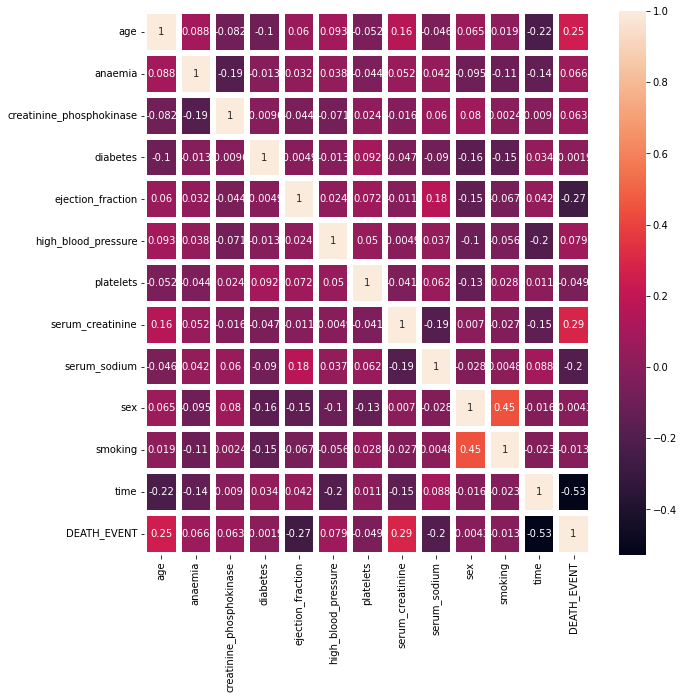

In [ ]:
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, linewidths=5, ax=ax)
plt.show()

In [ ]:
corr = data.corr()
corr_target = abs(corr["DEATH_EVENT"])
relevant_features = corr_target[corr_target > 0.1]
relevant_features

age                  0.253729
ejection_fraction    0.268603
serum_creatinine     0.294278
serum_sodium         0.195204
time                 0.526964
DEATH_EVENT          1.000000
Name: DEATH_EVENT, dtype: float64

In [ ]:
# Train and Test Split

accuracy_list = []
algorithm = []
predict_list = []

x_train, x_test, y_train, y_test = tts(data.loc[:, {"age", "ejection_fraction", "serum_creatinine",
                                                    "serum_sodium", "time"}],
                                       data["DEATH_EVENT"], test_size=0.2)

print("x_train shape :", x_train.shape)
print("x_test shape :", x_test.shape)
print("y_train shape :", y_train.shape)
print("y_test shape :", y_test.shape)

x_train shape : (239, 5)
x_test shape : (60, 5)
y_train shape : (239,)
y_test shape : (60,)


test accuracy 0.8833333333333333


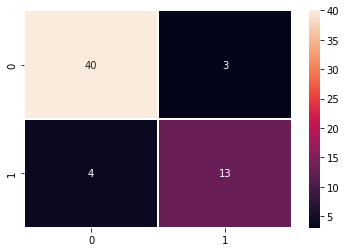

In [ ]:
# Logistic Regression
data_lr = LogisticRegression()
data_lr.fit(x_train, y_train)
accuracy_list.append(data_lr.score(x_train, y_train))
algorithm.append("Logistic Regression")
print("test accuracy", data_lr.score(x_test, y_test))

cm = confusion_matrix(y_test, data_lr.predict(x_test))
predict_list.append(cm.item(0) + cm.item(2))
sns.heatmap(cm,annot=True, linewidths=.5)
plt.show()

Test accuracy 0.8833333333333333


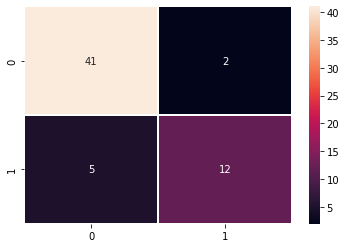

In [ ]:
# Support Vector Machine

data_svc = SVC()
data_svc.fit(x_train, y_train)
print("Test accuracy", data_svc.score(x_test, y_test))
accuracy_list.append(data_svc.score(x_test, y_test))
algorithm.append("Support Vector Machine")

cm = confusion_matrix(y_test, data_svc.predict(x_test))
predict_list.append(cm.item(0) + cm.item(2))
sns.heatmap(cm,annot=True, linewidths=.5)
plt.show()

Test accuracy 0.85


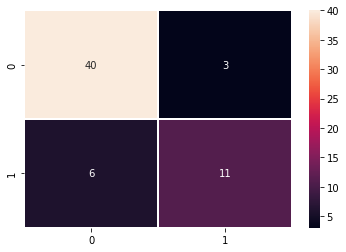

In [ ]:
# Native Bayes

data_nb = GaussianNB()
data_nb.fit(x_train, y_train)
print("Test accuracy", data_nb.score(x_test, y_test))
accuracy_list.append(data_nb.score(x_test, y_test))
algorithm.append("Native Bayes")

cm = confusion_matrix(y_test, data_nb.predict(x_test))
predict_list.append(cm.item(0) + cm.item(2))
sns.heatmap(cm,annot=True, linewidths=.5)
plt.show()

Test acuraccy 0.85


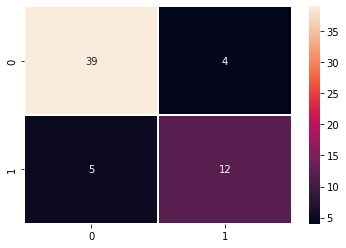

In [ ]:
# Decision Tree Classifier

data_tree = DecisionTreeClassifier()
data_tree.fit(x_train, y_train)
print("Test acuraccy", data_tree.score(x_test, y_test))
accuracy_list.append(data_tree.score(x_test, y_test))
algorithm.append("Decision Tree Classifier")

cm = confusion_matrix(y_test, data_tree.predict(x_test))
predict_list.append(cm.item(0) + cm.item(2))
sns.heatmap(cm,annot=True, linewidths=.5)
plt.show()

Test accuracy 0.8333333333333334


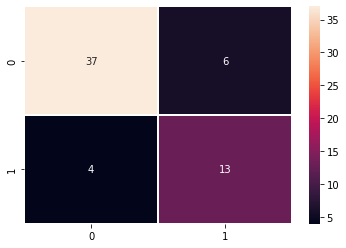

In [ ]:
# Random Forest Classifier
param_grid = {"n_estimators": np.arange(10, 100,10)}
data_rf = RandomForestClassifier()
data_rf_gsc = GridSearchCV(data_rf, param_grid, cv=4)
data_rf_gsc.fit(x_train, y_train)
print("Best K ")
print("Test accuracy", data_rf_gsc.score(x_test, y_test))
accuracy_list.append(data_rf_gsc.score(x_test, y_test))
algorithm.append(" Random Forest Classifier")

cm = confusion_matrix(y_test, data_rf_gsc.predict(x_test))
predict_list.append(cm.item(0) + cm.item(2))
sns.heatmap(cm,annot=True, linewidths=.5)
plt.show()